# Let’s compare KOREA to JAPAN with Economy Indices.


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
plt.style.use('ggplot')

In [4]:
p = './WDI_csv/WDIData.csv'
new_data = pd.read_csv(p)

In [8]:
path = '../Week-5-Visualization/world-development-indicators/Indicators.csv'
df = pd.read_csv(path)

In [10]:
# Create list of unique indicators, indicator codes
Indicator_array =  df[['IndicatorName','IndicatorCode']].drop_duplicates().values
Indicator_array

array([['Adolescent fertility rate (births per 1,000 women ages 15-19)',
        'SP.ADO.TFRT'],
       ['Age dependency ratio (% of working-age population)',
        'SP.POP.DPND'],
       ['Age dependency ratio, old (% of working-age population)',
        'SP.POP.DPND.OL'],
       ...,
       ['Fish species, threatened', 'EN.FSH.THRD.NO'],
       ['Mammal species, threatened', 'EN.MAM.THRD.NO'],
       ['Plant species (higher), threatened', 'EN.HPT.THRD.NO']],
      dtype=object)

In [11]:
modified_indicators = []
unique_indicator_codes = []
for ele in Indicator_array:
    indicator = ele[0]
    indicator_code = ele[1].strip()
    if indicator_code not in unique_indicator_codes:
        # delete , ( ) from the IndicatorNames
        new_indicator = re.sub('[,()]',"",indicator).lower()
        # replace - with "to" and make all words into lower case
        new_indicator = re.sub('-'," to ",new_indicator).lower()
        modified_indicators.append([new_indicator,indicator_code])
        unique_indicator_codes.append(indicator_code)

Indicators = pd.DataFrame(modified_indicators,columns=['IndicatorName','IndicatorCode'])
Indicators = Indicators.drop_duplicates()
Indicators.shape

(1344, 2)

In [12]:
# dict 생성, 지표를 간소화.
key_word_dict = {}
key_word_dict['Demography'] = ['population','birth','death','fertility','mortality','expectancy']
key_word_dict['Food'] = ['food','grain','nutrition','calories']
key_word_dict['Trade'] = ['trade','import','export','good','shipping','shipment']
key_word_dict['Health'] = ['health','desease','hospital','mortality','doctor']
key_word_dict['Economy'] = ['GNI','income','gdp','gni','deficit','budget','market','stock','bond','infrastructure', 'saving', 'household', 'debt']
key_word_dict['Energy'] = ['fuel','energy','power','emission','electric','electricity']
key_word_dict['Education'] = ['education','literacy']
key_word_dict['Employment'] =['employed','employment','umemployed','unemployment','female']
key_word_dict['Rural'] = ['rural','village']
key_word_dict['Urban'] = ['urban','city']
key_word_dict['Tech'] = ['technology','research','intellectual','r&d']

In [13]:
# 지표 추출 ( 교육 )
feature = 'Economy'
for indicator_ele in Indicators.values:
    for ele in key_word_dict[feature]:
        word_list = indicator_ele[0].split()
        if ele in word_list or ele+'s' in word_list:
            # Uncomment this line to print the indicators explicitely
            print(indicator_ele)
            break

['international migrant stock % of population' 'SM.POP.TOTL.ZS']
['international migrant stock total' 'SM.POP.TOTL']
['merchandise exports to high to income economies % of total merchandise exports'
 'TX.VAL.MRCH.HI.ZS']
['merchandise imports from high to income economies % of total merchandise imports'
 'TM.VAL.MRCH.HI.ZS']
['merchandise trade % of gdp' 'TG.VAL.TOTL.GD.ZS']
['gdp at market prices current us$' 'NY.GDP.MKTP.CD']
['gdp per capita current us$' 'NY.GDP.PCAP.CD']
['gni current us$' 'NY.GNP.MKTP.CD']
['net oda received % of gni' 'DT.ODA.ODAT.GN.ZS']
['co2 emissions kg per 2005 us$ of gdp' 'EN.ATM.CO2E.KD.GD']
['exports of goods and services % of gdp' 'NE.EXP.GNFS.ZS']
['external balance on goods and services % of gdp' 'NE.RSB.GNFS.ZS']
['gdp at market prices constant 2005 us$' 'NY.GDP.MKTP.KD']
['gdp per capita constant 2005 us$' 'NY.GDP.PCAP.KD']
['general government final consumption expenditure % of gdp'
 'NE.CON.GOVT.ZS']
['gni constant 2005 us$' 'NY.GNP.MKTP.KD']
['gni 

In [39]:
picked_indicators = [
    #economy
    ['gdp per capita current us$' 'NY.GDP.PCAP.CD'],
    ['gdp growth annual %' 'NY.GDP.MKTP.KD.ZG'],
    ['gni per capita ppp current international $' 'NY.GNP.PCAP.PP.CD'],
    ['foreign direct investment net inflows % of gdp' 'BX.KLT.DINV.WD.GD.ZS'],
 
    # tech
    ['high to technology exports % of manufactured exports' 'TX.VAL.TECH.MF.ZS'],
    ['high to technology exports current us$' 'TX.VAL.TECH.CD'],
    ['researchers in r&d per million people' 'SP.POP.SCIE.RD.P6'],
    ['technicians in r&d per million people' 'SP.POP.TECH.RD.P6'],
    
    # employment
    ['unemployment total % of total labor force' 'SL.UEM.TOTL.ZS'],
    ['unemployment total % of total labor force national estimate' 'SL.UEM.TOTL.NE.ZS'],
    ['employers total % of employment' 'SL.EMP.MPYR.ZS'],
  
    # Social
    ['labor force participation rate female % of female population ages 15+ national estimate' 'SL.TLF.CACT.FE.NE.ZS'],
    ['age dependency ratio old % of working to age population' 'SP.POP.DPND.OL'],
    ['birth rate crude per 1000 people' 'SP.DYN.CBRT.IN']
    
     # Government
    ['central government debt total % of gdp' 'GC.DOD.TOTL.GD.ZS'],
    ['gross savings current us$' 'NY.GNS.ICTR.CD'],
    

]

In [40]:
picked_indicators_code = []
for ele in picked_indicators :
    code = re.findall('([A-Z.]\S*)',ele[0])
    picked_indicators_code.append(code[0])
    
picked_indicators_code

['NY.GDP.PCAP.CD',
 'NY.GDP.MKTP.KD.ZG',
 'NY.GNP.PCAP.PP.CD',
 'BX.KLT.DINV.WD.GD.ZS',
 'GC.DOD.TOTL.GD.ZS',
 'NY.GNS.ICTR.CD',
 'SL.UEM.TOTL.ZS',
 'SL.UEM.TOTL.NE.ZS',
 'SL.EMP.MPYR.ZS',
 'TX.VAL.TECH.MF.ZS',
 'TX.VAL.TECH.CD',
 'SP.POP.SCIE.RD.P6',
 'SP.POP.TECH.RD.P6',
 'SL.TLF.CACT.FE.NE.ZS',
 'SP.POP.DPND.OL',
 'SP.DYN.CBRT.IN']

In [41]:
# Subset of data with the required features alone
df_subset = df[df['IndicatorCode'].isin(picked_indicators_code)]

# Chose only India and China for Analysis
df_korea = df_subset[df['CountryName'].str.contains("Korea, Rep")]
df_japan = df_subset[df['CountryName'].str.contains("Japan")]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [42]:
def add_data(now_data,new_data):
    dict_list =[]
    for i in picked_indicators_code :
        nowdata = now_data[now_data['IndicatorCode'] == i]
        add_year = nowdata['Year'].max() + 1
        last = len(now_data)
        while add_year < 2019 :
            filter1 = new_data['Indicator Code'] == i
            filter2 = new_data['Country Name'].isin(now_data['CountryName'])
            target = new_data[filter1 & filter2]
            theyear = int(add_year)
            try:
                added_data ={
                    'CountryName' : target['Country Name'].values[0],
                    'CountryCode': target['Country Code'].values[0],
                    'IndicatorName':target['Indicator Name'].values[0],
                    'IndicatorCode': target['Indicator Code'].values[0],
                    'Year':theyear,
                    'Value':target[str(add_year)].values[0]
                }
            except:
                added_data ={
                    'CountryName' : None,
                    'CountryCode': None,
                    'IndicatorName':None,
                    'IndicatorCode': None,
                    'Year':None,
                    'Value':None
                }
            dict_list.append(added_data)
            add_year = add_year + 1
    now_data = now_data.append(dict_list,ignore_index=True)
    return now_data

In [43]:
df_korea = add_data(df_korea,new_data)
df_japan = add_data(df_japan,new_data)

In [44]:
def plot_indicator(indicator, delta=10):
    # df 정의하기
    ds_korea = df_korea[['IndicatorName','Year','Value']][df_korea['IndicatorCode']==indicator]
    ds_japan = df_japan[['IndicatorName','Year','Value']][df_japan['IndicatorCode']==indicator]
    try:
        title = ds_korea['IndicatorName'].iloc[0]
    except:
        title = "None"
        
    ykorea = ds_korea['Value'].values
    yjapan = ds_japan['Value'].values
    xkorea = ds_korea['Year'].values
    xjapan = ds_japan['Year'].values

    plt.plot(xkorea,ykorea,label='Korea')
    plt.plot(xjapan,yjapan,label='Japan')
    plt.title(title)
    plt.legend(loc=2)

In [64]:
df_korea = df_subset[df['CountryName'].str.contains("Korea, Rep")]
df_korea = add_data(df_korea,new_data)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


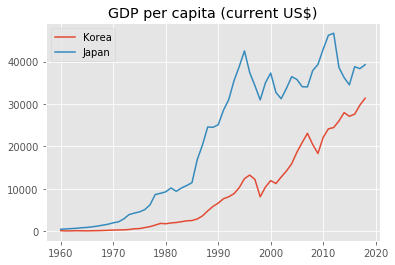

In [65]:
plot_indicator(picked_indicators_code[0])